### Importing Libraries and Dataset
<hr/>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/train.csv', sep=',')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
submission_test = pd.read_csv('data/test.csv', sep=',')
submission_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [4]:
df.shape

(20758, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- No missing data in the database

#### Description of each column

- id: An identifier for each entry in the dataset. 

- Gender: The gender of the individual, which could be categories like Male or Female.

- Age: The age of the individual, likely represented in years.

- Height: The height of the individual.

- Weight: The weight of the individual.

- family_history_with_overweight: A binary or categorical attribute indicating whether there is a family history of overweight/obesity.

- FAVC: Stands for Frequent Consumption of High Caloric Food, likely a binary variable indicating if the individual frequently consumes high-caloric food.

- FCVC: Frequency of Consumption of Vegetables, a numeric or categorical variable indicating how often the individual consumes vegetables.

- NCP: Number of Main Meals, a numeric or categorical variable indicating the typical number of main meals the individual has per day.

- CAEC: Consumption of Food Between Meals, a categorical variable indicating how often the individual eats between meals.

- SMOKE: A binary variable indicating whether the individual smokes.

- CH2O: The amount of water consumed daily by the individual, potentially in liters.

- SCC: Stands for Caloric Consumption monitoring, a binary variable indicating whether the individual monitors their caloric intake.

- FAF: Physical Activity Frequency, a numeric or categorical variable indicating the frequency of physical activity.

- TUE: Time Using Electronic Devices, a numeric or categorical variable indicating the amount of time the individual spends using electronic devices per day.

- CALC: Alcohol Consumption, a categorical variable indicating the frequency of alcohol consumption.

- MTRANS: Main Transportation Mode, a categorical variable indicating the primary mode of transportation used by the individual.

- NObeyesdad: Obesity Level, a categorical variable indicating the level of obesity of the individual. This could range from Normal Weight to Different Classes of Obesity.

### Add Features
<hr/>

- Calculate IMC

In [7]:
df['IMC'] = df['Weight']/(df['Height']**2)
submission_test['IMC'] = submission_test['Weight']/(submission_test['Height']**2)

### Analysis
<hr/>

#### What is the distribution of the output variable between the categories?

In [8]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [9]:
df['NObeyesdad'].str.contains('Obesity').sum()/df.shape[0], df['NObeyesdad'].str.contains('Overweight').sum()/df.shape[0]

(0.49156951536756915, 0.23841410540514502)

- The dataset seems to be distributed among the classes
- 50% of the dataset is obese and 23% is overweight

#### What is the distribution of the input variables?

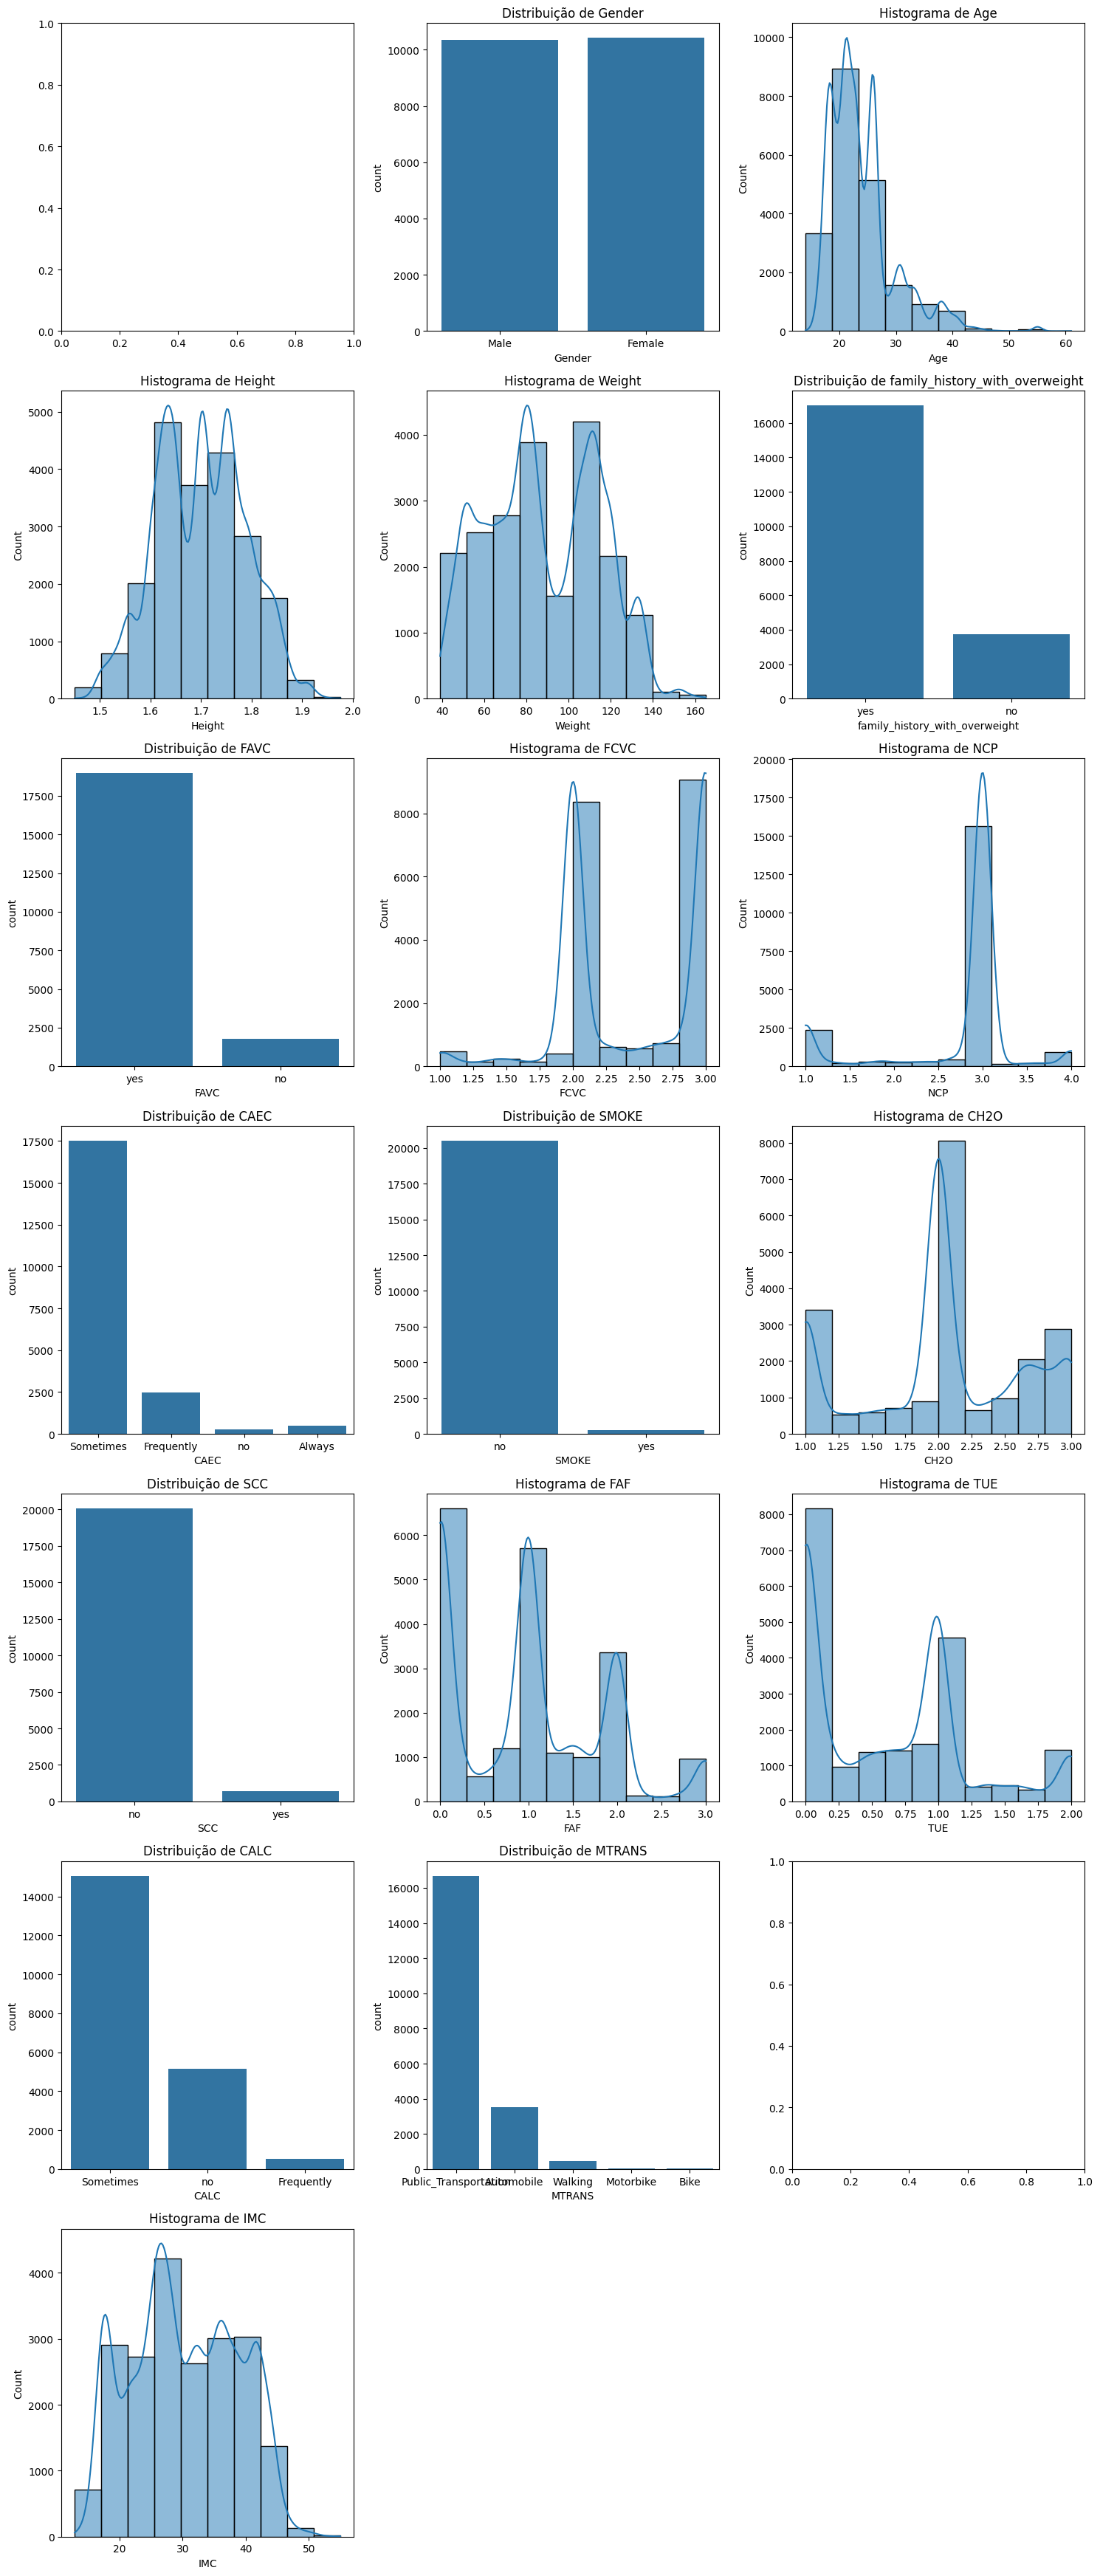

In [10]:
def plot_grid_distributions(df):
    n_vars = df.shape[1]  # Número de variáveis
    n_cols = 3  # Número de colunas no grid
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula o número necessário de linhas

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Transforma a matriz de eixos em um array 1D para fácil iteração

    for i, column in enumerate(df.columns):
        if column not in ('id', 'NObeyesdad'):
            ax = axes[i]
            if df[column].dtype == 'object':  # Variável categórica
                sns.countplot(data=df, x=column, ax=ax)
                ax.set_title(f'Distribuição de {column}')
            else:  # Variável numérica
                sns.histplot(data=df, x=column, kde=True, bins=10, ax=ax)
                ax.set_title(f'Histograma de {column}')
    
    # Esconde os eixos extras se o número de variáveis não preencher o grid completo
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_grid_distributions(df)

Conclusions:

- The dataset seems to be distributed in terms of the number of men and women
- Age seems to be skewed towards younger people
- Height seems to have a normal distribution
- Most of the dataset has a family history of overweight
- Most of the dataset has frequent consumption of high caloric food (FAVC)
- Most of the dataset doesn't smoke (SMOKE)
- Water consumption is concentrated at 2 liters, but there is a considerable volume consuming 1 liter and 3 liters (CH2O)
- Most of the dataset doesn't monitor the calories they consume (SCC)
- Most of the dataset does physical activity once a week or not at all (FAF)
- Most of the dataset spends 1 hour on technology or 0 hours (TUE)
- Most of the dataset consumes alcohol "sometimes" (CALC)
- Most of the dataset uses public transport (MTRANS)


Insights:
- The distribution of time spent on technology is strange, given that we're looking at a younger population
- As the dataset is concentrated in the overweight and obese categories, the low frequency of physical activity and high consumption of caloric foods makes sense 

#### What is the relationship between the output variable and the input variables?

##### Variáveis Categóricas

In [11]:
def plot_categorical_with_hue(df, hue):
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = [col for col in categorical_columns if col != hue]  # Remove o hue das variáveis categóricas
    
    n_vars = len(categorical_columns)  # Número de variáveis categóricas sem contar o hue
    n_cols = 3  # Número de colunas no grid
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula o número necessário de linhas

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Transforma a matriz de eixos em um array 1D para fácil iteração

    for i, column in enumerate(categorical_columns):
        ax = axes[i]
        # Calcular a frequência relativa
        freq = (df.groupby([column])[hue]
                .value_counts(normalize=True)
                .rename('percentage')
                .mul(100)
                .reset_index()
                .sort_values(hue))
        sns.barplot(x=column, y='percentage', hue=hue, data=freq, ax=ax)
        ax.set_title(f'Frequência Relativa de {column}')
        ax.set_ylabel('Percentagem (%)')
    
    # Esconde os eixos extras se o número de variáveis não preencher o grid completo
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


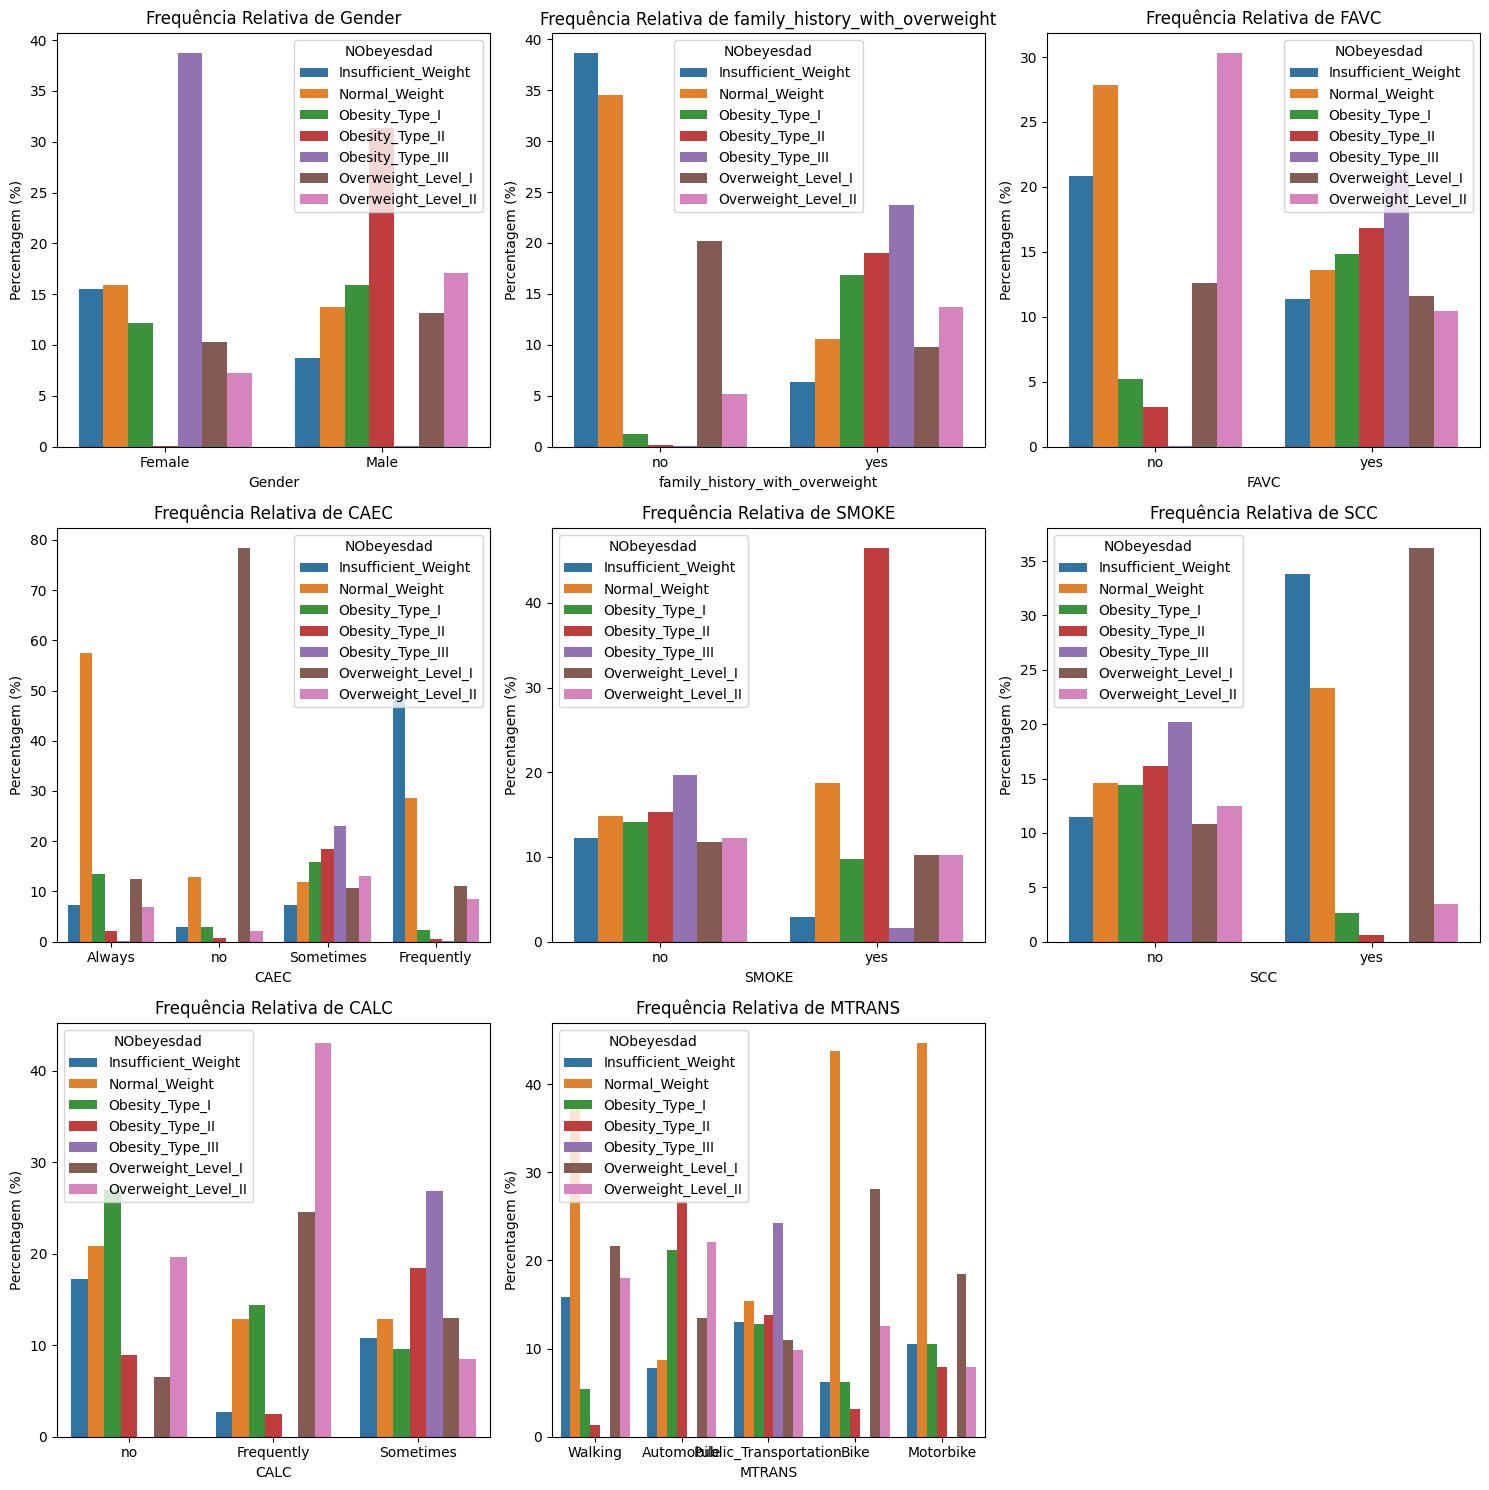

In [12]:
plot_categorical_with_hue(df, 'NObeyesdad')

In [13]:
df.loc[df['NObeyesdad'] == 'Obesity_Type_III', 'Gender'].value_counts()

Gender
Female    4041
Male         5
Name: count, dtype: int64

In [14]:
df.loc[df['NObeyesdad'] == 'Obesity_Type_II', 'Gender'].value_counts()

Gender
Male      3240
Female       8
Name: count, dtype: int64

In [15]:
df.loc[df['SMOKE'] == 'yes', 'Gender'].value_counts()

Gender
Male      193
Female     52
Name: count, dtype: int64

Conlusions: 

- Males have basically no type III obesity and females have practically no type II obesity.
- Most smokers are men, which is why type III obesity is not very common in smokers


##### Variáveis Numéricas

In [16]:
# Função para plotar boxplots para variáveis numéricas com hue
def plot_numerical_boxplots_with_hue(df, hue):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    numerical_columns = [x for x in numerical_columns if x not in ('id', hue)]
    n_vars = len(numerical_columns)  # Número de variáveis numéricas
    n_cols = 2  # Número de colunas no grid
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula o número necessário de linhas

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Transforma a matriz de eixos em um array 1D para fácil iteração

    for i, column in enumerate(numerical_columns):
        ax = axes[i]
        # Plota o boxplot para cada categoria do hue
        boxplot = sns.boxplot(data=df, x=hue, y=column, ax=ax, hue=hue, showfliers=False)
        ax.set_title(f'Boxplot de {column} por {hue}')
        # Rotação dos rótulos do eixo x
        boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
    # Esconde os eixos extras se o número de variáveis não preencher o grid completo
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

C:\Users\mwuillau\AppData\Local\Temp\ipykernel_14524\68239479.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
C:\Users\mwuillau\AppData\Local\Temp\ipykernel_14524\68239479.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
C:\Users\mwuillau\AppData\Local\Temp\ipykernel_14524\68239479.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)
C:\Users\mwuillau\AppData\Local\Temp\ipykernel_14524\68239479.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_

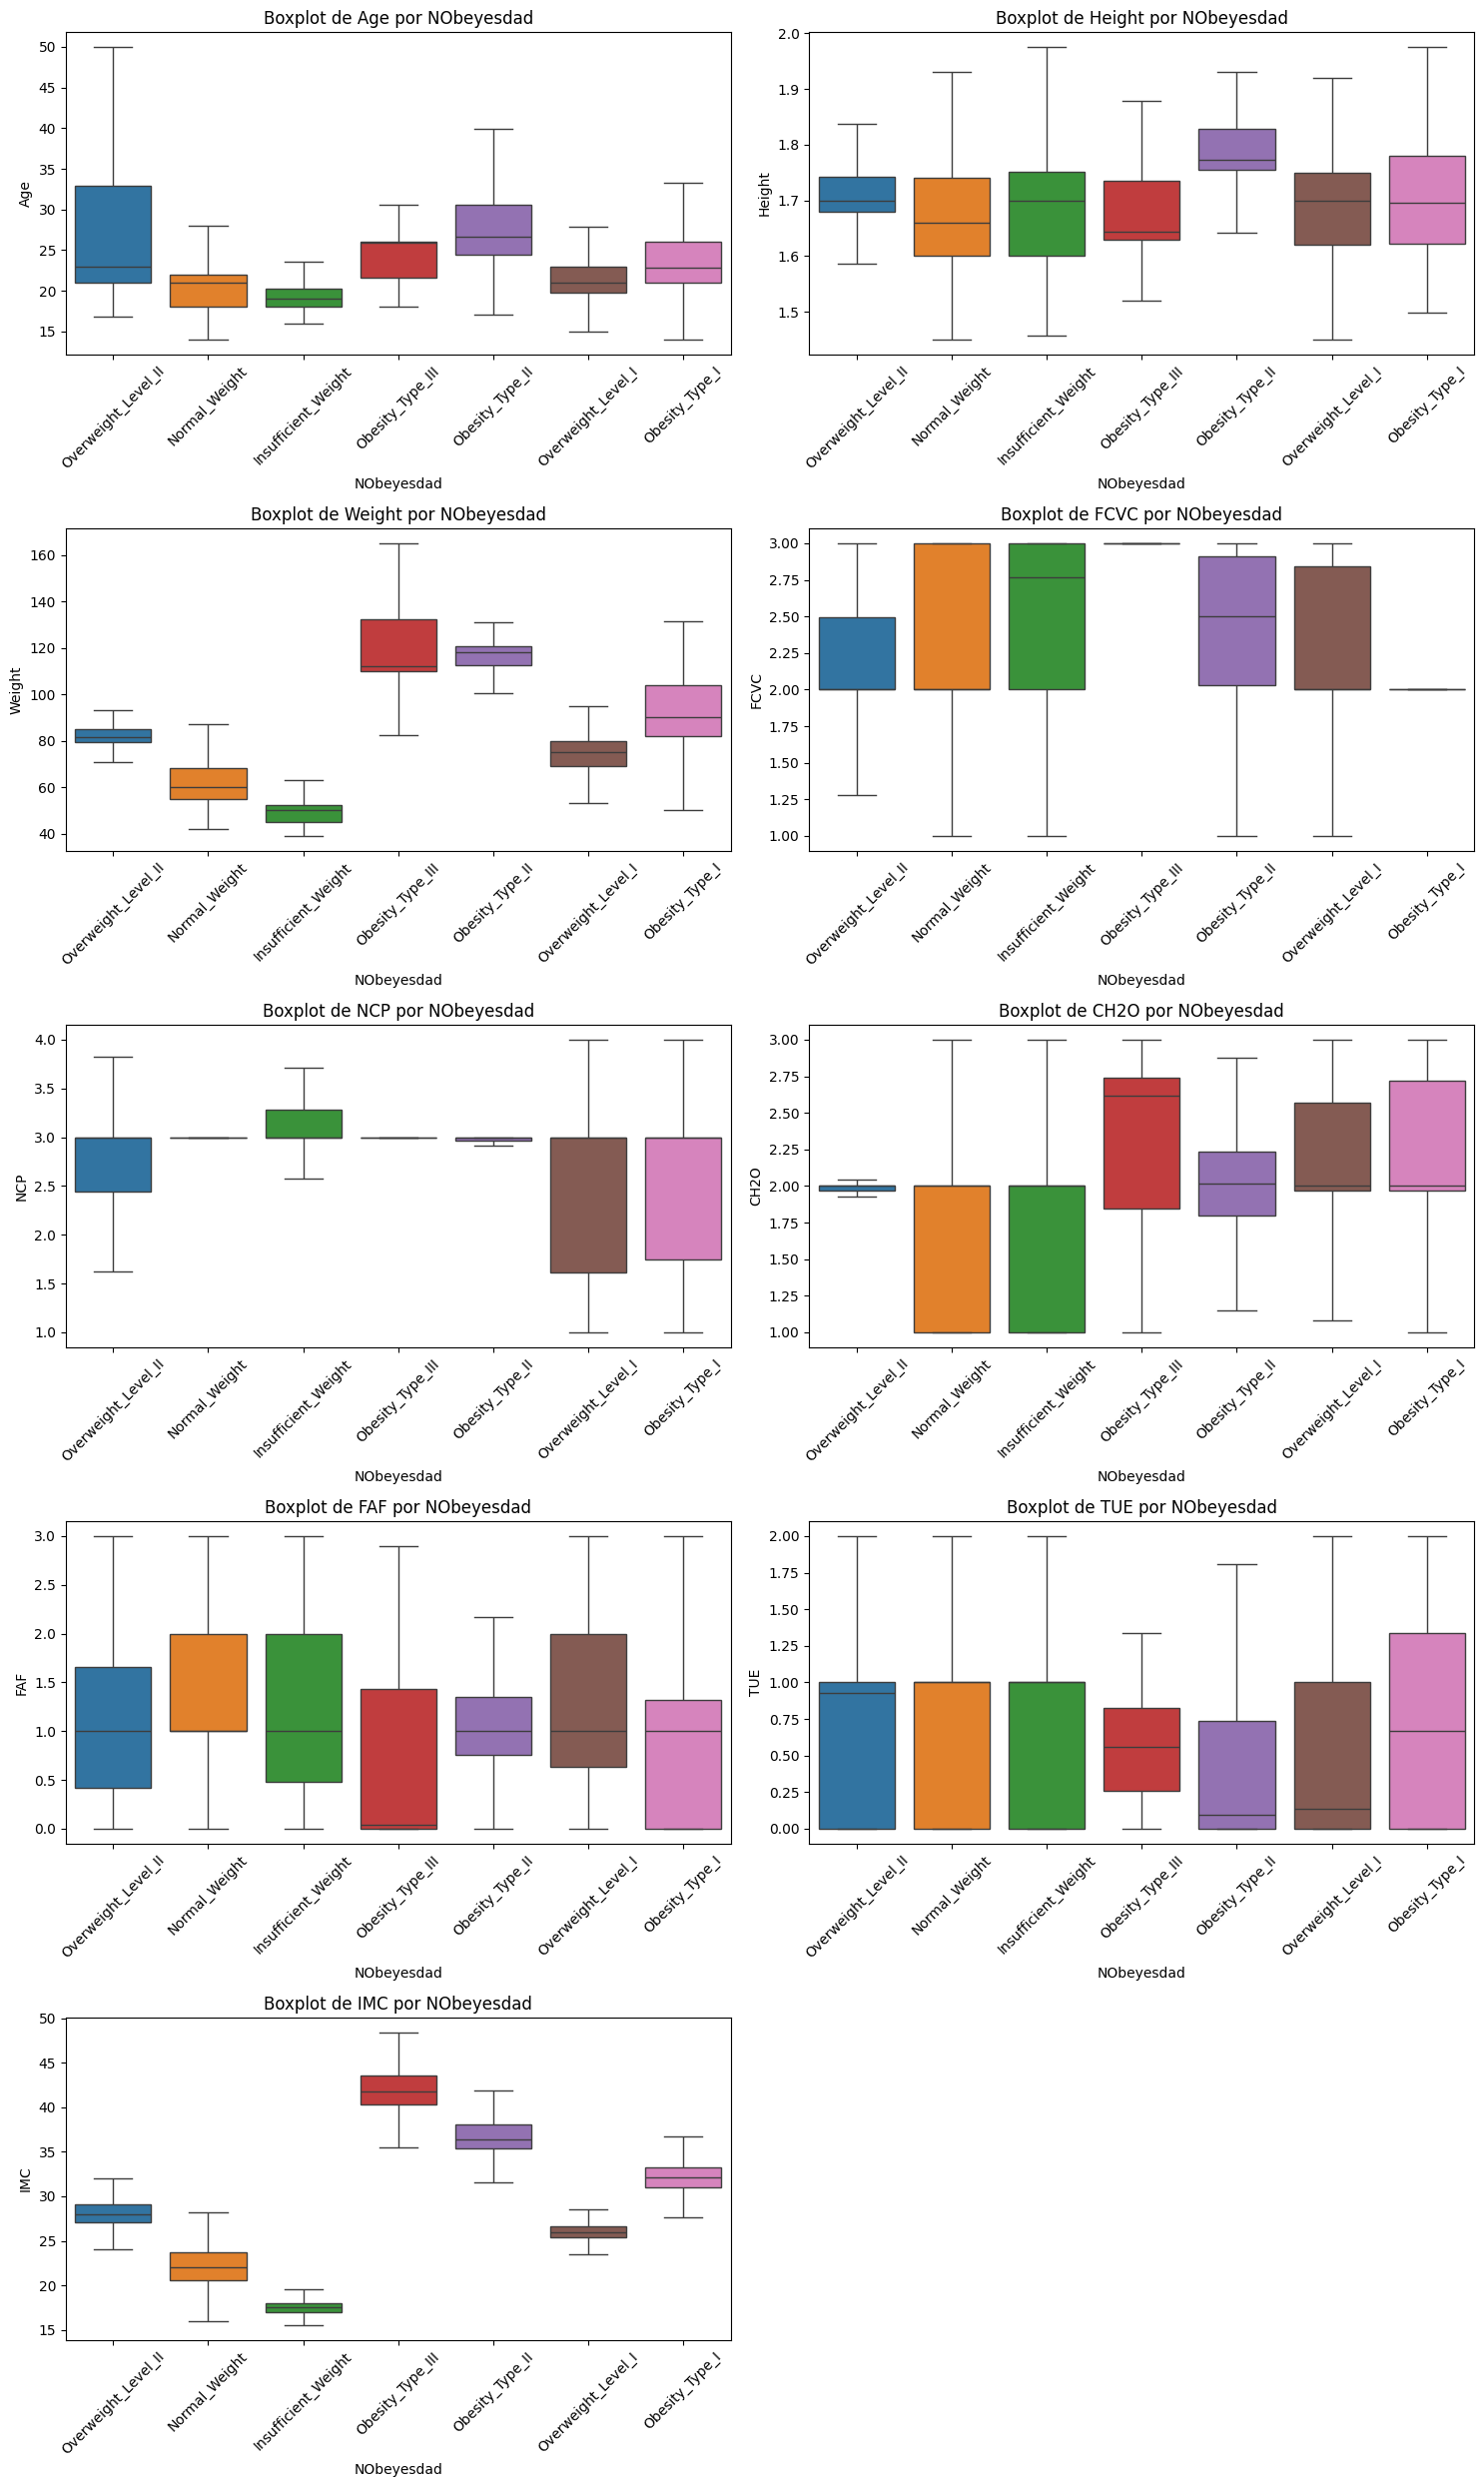

In [17]:
plot_numerical_boxplots_with_hue(df, 'NObeyesdad')

Conclusions:

- Visually, all the numerical variables show variations in their distributions when it comes to each category of the output variable.

#### What is the relationship between input variables

##### Numerical Variables

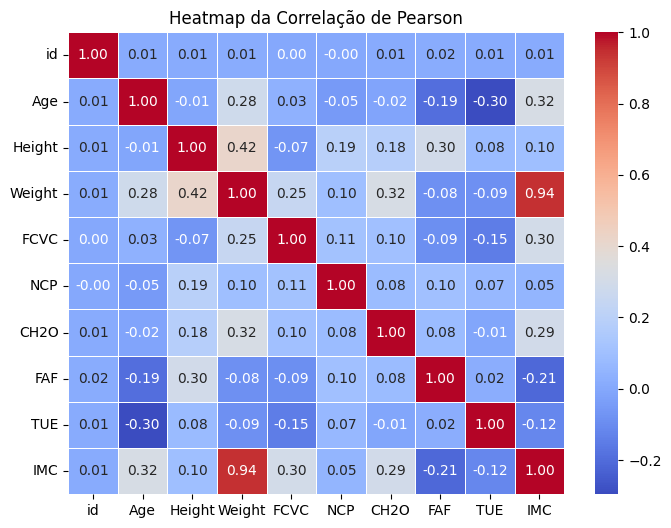

In [18]:
# Normalização dos dados
scaler = StandardScaler()
df_to_scale = df.loc[:, df.select_dtypes(include=[np.number]).columns]
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df.select_dtypes(include=[np.number]).columns)

# Cálculo da correlação de Pearson
correlation_matrix = df_normalized.corr()

# Plotando o heatmap da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap da Correlação de Pearson')
plt.show()

Conclusions:

- The strong relationship between weight and IMC was expected, since one is calculated from the other
- Apart from this, the second strongest correlation is between age and TUE, but it doesn't seem to be very significant

##### Categorical Variables

In [19]:
def test_chi_squared_for_categorical_pairs(df, alpha=0.05):
    # Filtra apenas as colunas categóricas
    categorical_columns = df.select_dtypes(include=['category', 'object']).columns
    # Gera todas as combinações possíveis de pares de colunas
    column_pairs = list(combinations(categorical_columns, 2))

    # Testa cada par de colunas
    for (col1, col2) in column_pairs:
        # Cria a tabela de contingência para o par de colunas
        contingency_table = pd.crosstab(df[col1], df[col2])
        # Aplica o teste Qui-Quadrado
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Checa o p-value contra o alpha para determinar a independência
        if p_value < alpha:
            print(f"As variáveis '{col1}' e '{col2}' estão associadas (p-value = {p_value:.4f}). Rejeita-se a hipótese nula de independência.")
        else:
            print(f"As variáveis '{col1}' e '{col2}' são independentes (p-value = {p_value:.4f}). Não se rejeita a hipótese nula de independência.")


In [20]:
test_chi_squared_for_categorical_pairs(df)

As variáveis 'Gender' e 'family_history_with_overweight' estão associadas (p-value = 0.0000). Rejeita-se a hipótese nula de independência.
As variáveis 'Gender' e 'FAVC' estão associadas (p-value = 0.0018). Rejeita-se a hipótese nula de independência.
As variáveis 'Gender' e 'CAEC' estão associadas (p-value = 0.0000). Rejeita-se a hipótese nula de independência.
As variáveis 'Gender' e 'SMOKE' estão associadas (p-value = 0.0000). Rejeita-se a hipótese nula de independência.
As variáveis 'Gender' e 'SCC' estão associadas (p-value = 0.0000). Rejeita-se a hipótese nula de independência.
As variáveis 'Gender' e 'CALC' estão associadas (p-value = 0.0000). Rejeita-se a hipótese nula de independência.
As variáveis 'Gender' e 'MTRANS' estão associadas (p-value = 0.0000). Rejeita-se a hipótese nula de independência.
As variáveis 'Gender' e 'NObeyesdad' estão associadas (p-value = 0.0000). Rejeita-se a hipótese nula de independência.
As variáveis 'family_history_with_overweight' e 'FAVC' estão a

Conclusions:

- Most categorical variables are not independent of each other

### Split and Transform
<hr/>

#### Split into train and test and scale

In [21]:
# Separando variáveis explicativas (features) e variável alvo (target) se necessário
features = df.drop(['id', 'NObeyesdad'], axis=1)  # Exemplo: 'Salário' poderia ser uma variável alvo
target = df['NObeyesdad']
submission_test_id = submission_test['id']
submission_test = submission_test.drop(['id'], axis=1)
# Divisão entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Identificação das colunas numéricas e categóricas
numeric_features = features.select_dtypes(include=[np.number]).columns
categorical_features = features.select_dtypes(include=['category', 'object']).columns
# Criando o transformer para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando o transformer para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinando os transformers em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicando o preprocessor aos dados de treino e teste
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
submission_test_transformed = preprocessor.transform(submission_test)

# Convertendo os resultados transformados de volta para DataFrame para facilitar a manipulação (opcional)
column_names = list(numeric_features) + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
X_train_transformed = pd.DataFrame(X_train_transformed, columns=column_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=column_names)
submission_test_transformed = pd.DataFrame(submission_test_transformed, columns=column_names)


In [22]:
y_train.value_counts()

NObeyesdad
Obesity_Type_III       3242
Obesity_Type_II        2591
Normal_Weight          2456
Obesity_Type_I         2367
Overweight_Level_II    2008
Insufficient_Weight    1999
Overweight_Level_I     1943
Name: count, dtype: int64

In [23]:
y_test.value_counts()

NObeyesdad
Obesity_Type_III       804
Obesity_Type_II        657
Normal_Weight          626
Obesity_Type_I         543
Insufficient_Weight    524
Overweight_Level_II    514
Overweight_Level_I     484
Name: count, dtype: int64

- Categories seem well distributed in training and testing

In [24]:
X_train_transformed.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,1.660600e+04,1.660600e+04,1.660600e+04,1.660600e+04,1.660600e+04,1.660600e+04,1.660600e+04,1.660600e+04,1.660600e+04,16606.000000,...,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000,16606.000000
mean,-2.353357e-16,7.060072e-18,-2.892757e-16,5.930460e-16,-1.476197e-17,6.240676e-16,2.888211e-18,1.444106e-16,5.511436e-16,0.501867,...,0.966097,0.033903,0.024991,0.726424,0.248585,0.172167,0.001626,0.001807,0.802601,0.021799
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,0.500012,...,0.180986,0.180986,0.156102,0.445807,0.432206,0.377537,0.040291,0.042467,0.398048,0.146032
min,-1.721379e+00,-2.870463e+00,-1.859728e+00,-2.709399e+00,-2.502790e+00,-1.694229e+00,-1.172105e+00,-1.025610e+00,-2.075029e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.773646e-01,-7.840748e-01,-8.188263e-01,-8.326167e-01,3.387912e-01,-3.829499e-01,-1.161616e+00,-1.025610e+00,-7.404940e-01,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.845714e-01,-2.275884e-03,-1.426767e-01,-1.398149e-01,3.387912e-01,-4.742511e-02,1.692368e-02,-7.551537e-02,-1.029287e-01,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.666500e-01,7.143234e-01,8.981610e-01,1.044165e+00,3.387912e-01,8.307553e-01,7.309784e-01,6.297283e-01,8.116852e-01,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.456736e+00,3.160336e+00,2.928830e+00,1.044165e+00,1.759582e+00,1.599379e+00,2.394982e+00,2.285067e+00,2.972975e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- The data is properly normalized with standard deviation 1 and mean 0

#### Apply PCA to reduce dimentionality

In [25]:
X_train_transformed.shape

(16606, 31)

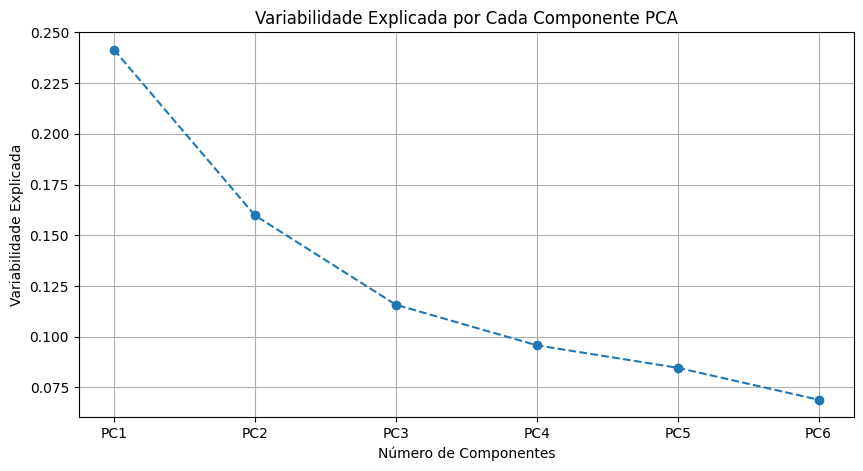

Number os components selected: 6
Variance explained by all the components: 0.7662760831567786


In [26]:
pca = PCA(n_components=0.70)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)
# Plotando a variabilidade explicada por cada componente
plt.figure(figsize=(10, 5))
pc_labels = [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]
plt.plot(pc_labels, pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Variabilidade Explicada por Cada Componente PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Variabilidade Explicada')
plt.grid(True)
plt.show()

# Exibindo a quantidade de componentes selecionados e a variância explicada
print("Number os components selected:", pca.n_components_)
print("Variance explained by all the components:", sum(pca.explained_variance_ratio_))

### Training Multiclass Models
<hr/>

#### Comparing models perfomance

In [27]:
# Definindo os modelos

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM":  SVC(random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

# Preparando os dados de entrada
datasets = {
    "Original Data": X_train_transformed,
    "PCA Data": X_train_pca
}


c:\Users\mwuillau\Documents\UFRJ\data-mining\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mwuillau\Documents\UFRJ\data-mining\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mwuillau\Documents\UFRJ\data-mining\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mwuillau\Documents\UFRJ\data-mining\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

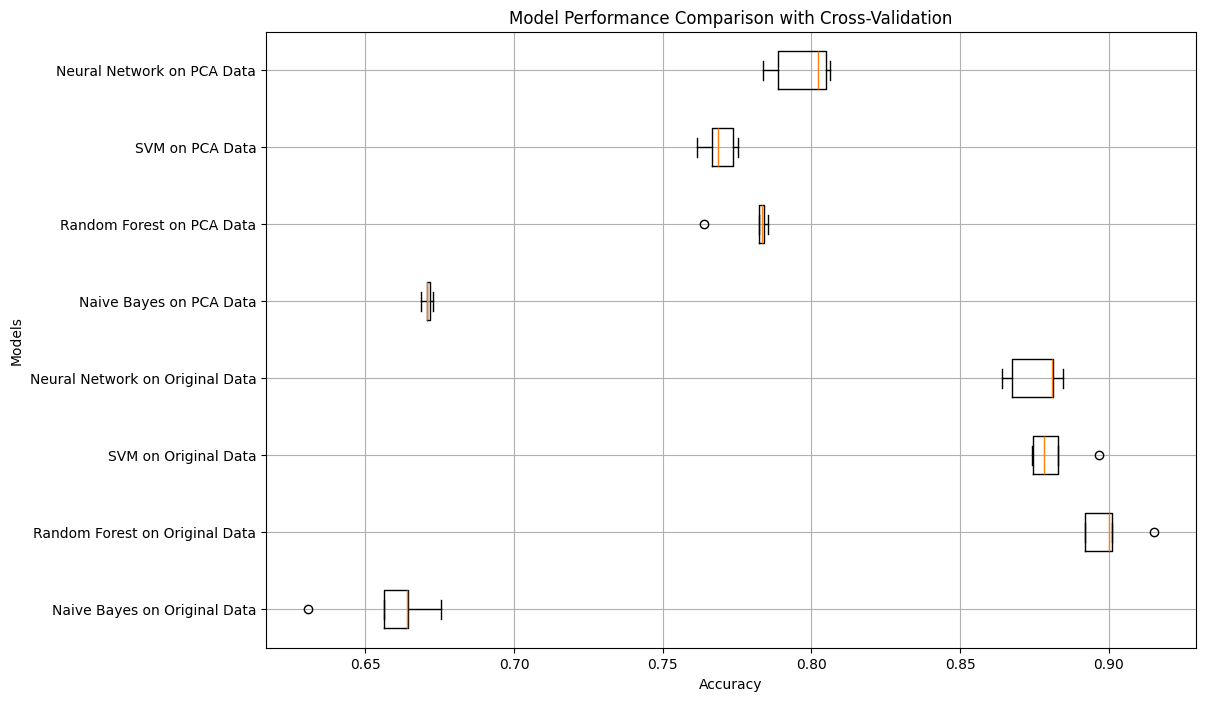

In [29]:

# Armazenar os resultados de validação cruzada
results = {}

# Aplicando validação cruzada
for data_key, data_value in datasets.items():
    for model_key, model in models.items():
        scores = cross_val_score(model, data_value, y_train, cv=5, scoring='accuracy')
        results[f"{model_key} on {data_key}"] = scores

# Preparando os dados para o boxplot
labels = list(results.keys())
scores_list = [scores for scores in results.values()]

# Plotando os resultados
plt.figure(figsize=(12, 8))
plt.boxplot(scores_list, labels=labels, vert=False)
plt.title('Model Performance Comparison with Cross-Validation')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.grid(True)
plt.show()

- Best model was Random Forest with original Data. 
- It makes sense that a tree model would have done better. In the exploratory analysis we saw that gender would be an optimal node to reduce the impurity between two types of obesity

#### Searching Random Forest Hyperparameters 

In [ ]:
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuração do GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

In [ ]:
# Melhores parâmetros e pontuação de treinamento
best_model = grid_search.best_estimator_
print("Best Parameters", grid_search.best_params_)
print("Training Score:", grid_search.best_score_)

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test_transformed)
test_score = accuracy_score(y_test, y_pred)
print("Test Score:", test_score)

Best Parameters {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training Score: 0.9027465559958964
Test Score: 0.9019749518304432


In [36]:
## To run without using grid search

best_params = {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train_transformed, y_train)
y_pred = best_model.predict(X_test_transformed)
test_score = accuracy_score(y_test, y_pred)

- The results were good with high accuracy

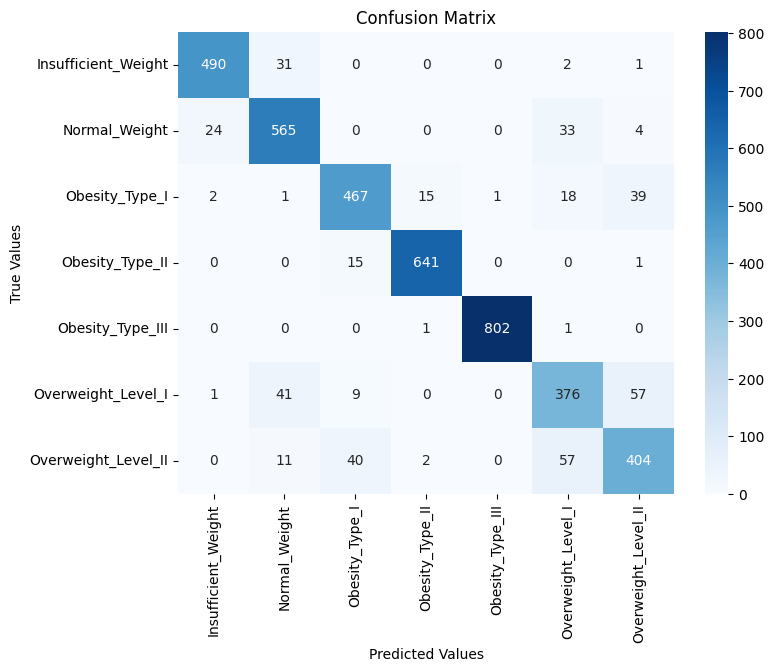

In [37]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

- It seems that the model confuses the classes Overweight_Level_I and Overweight_Level_II more

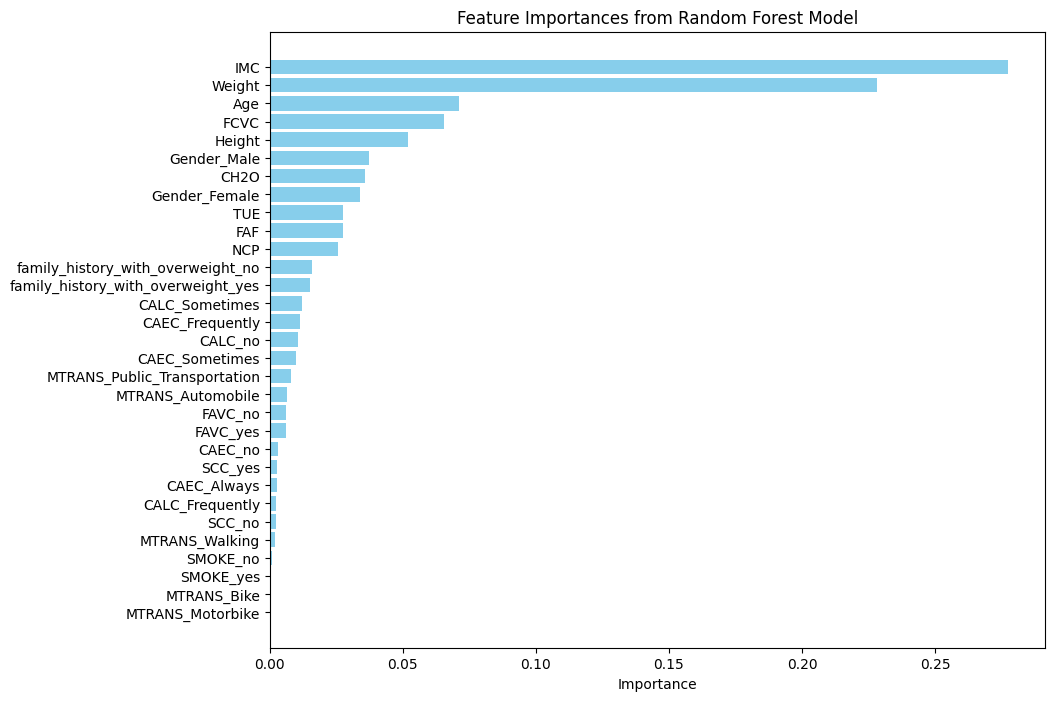

In [ ]:
# Obter as importâncias das características
feature_importances = best_model.feature_importances_

# Recuperar os nomes das características a partir do DataFrame transformado
feature_names = X_train_transformed.columns

# Criar um DataFrame para armazenar as importâncias e os nomes
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar o DataFrame pelas importâncias
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotar as importâncias das características
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a característica mais importante fique no topo
plt.show()

- IMC was the most important variable, it was a good addition to the dataset

#### Why 3 Insufficient weight people were classified as overweigh?

In [56]:
over_pred = pd.Series(y_pred).map(lambda x: 'Over' in x)  
insu_true = pd.Series(y_test).map(lambda x: 'Insu' in x).reset_index(drop=True)  

In [59]:
X_test.reset_index()[(over_pred) & (insu_true)]

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,IMC
314,7321,Female,37.524551,1.544937,62.320629,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,26.110205
1035,13132,Male,21.785351,1.535350,62.855073,no,yes,2.000000,2.815255,Sometimes,no,1.613928,no,0.976341,0.479221,no,Public_Transportation,26.664015
2871,9693,Female,39.135634,1.685947,79.713492,yes,yes,2.592247,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,no,Automobile,28.044261


It makes sense for these records to be missclassified as overweight
- IMC is in the pattern of overweight according to reasearch (most important variable)
- 2 of them have a family history
- all 3 eat high-calorie foods
- They don't monitor calorie consumption

#### Predict submission test

In [ ]:
predictions = pd.Series(best_model.predict(submission_test_transformed))
predictions.name = 'NObeyesdad'

In [ ]:
sub_df = pd.concat([submission_test_id, predictions], axis=1)
sub_df.to_csv('./data/model_output.csv', index=False)